In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Define the model

In [3]:
class Model:
    def __init__(self, n):
        self.w = tf.Variable(initial_value=tf.random.normal(shape=(n,1)))
        self.b = tf.Variable(initial_value=tf.random.normal(shape=(1,)))

    def __call__(self, x):
        return tf.matmul(x, self.w) + self.b

In [4]:
X = np.random.randn(40, 1).astype('float32')
Y = 4 * X + 3.3

model = Model(1)

## Define loss function

In [5]:
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [6]:
# current loss
print(mean_squared_error(Y, model(X)).numpy(), 'is the loss for our model')

21.559723 is the loss for our model


## Plot function

In [7]:
def plot(X, Y, model):
    fig = plt.figure()
    Y_pred = model(X)
    ax = plt.subplot(111)
    line1 = ax.scatter(X, Y, label='ground truth')
    line2, = ax.plot(X, Y_pred, label='predicted', c='orange')
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.grid(True)
    ax.legend(handles=[line1, line2], loc='best')
    ax.set_title(f'Current loss is {mean_squared_error(Y, Y_pred):0.3e}')

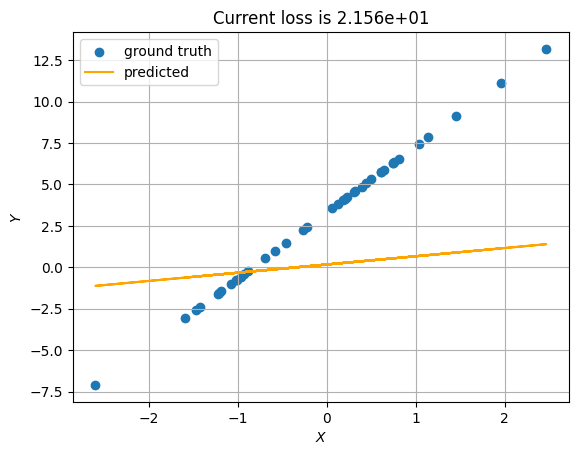

In [8]:
plot(X, Y, model)

## Train the model

In [9]:
def training_step(X, Y, model, learning_rate):
    # if persistent is true, then we can call gradient function of tape multiple time
    with tf.GradientTape(persistent=False) as tape:
        y_pred = model(X)
        loss = mean_squared_error(Y, y_pred)

    dl_dw, dl_db = tape.gradient(loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dl_dw)
    model.b.assign_sub(learning_rate * dl_db)
    return loss

In [10]:
X = np.random.randn(1000, 1).astype('float32')
TRUE_W = 5.5
TRUE_B = -3.3
Y = TRUE_W * X + TRUE_B

LEARNING_RATE = 0.1
EPOCHS = 100

model = Model(1)
losses = []
ws = []
bs = []

for epoch in range(EPOCHS):
    loss = training_step(X, Y, model, LEARNING_RATE)
    losses.append(loss)
    ws.append(model.w.numpy().flatten()[0])
    bs.append(model.b.numpy().flatten()[0])

    print(f'epoch: {epoch + 1:>3} loss: {loss:0.2e} w: {ws[-1]:0.3e} b: {bs[-1]:0.3e}')

epoch:   1 loss: 3.39e+01 w: 1.672e+00 b: -7.986e-01
epoch:   2 loss: 2.14e+01 w: 2.460e+00 b: -1.307e+00
epoch:   3 loss: 1.35e+01 w: 3.085e+00 b: -1.713e+00
epoch:   4 loss: 8.56e+00 w: 3.582e+00 b: -2.035e+00
epoch:   5 loss: 5.41e+00 w: 3.976e+00 b: -2.293e+00
epoch:   6 loss: 3.42e+00 w: 4.290e+00 b: -2.497e+00
epoch:   7 loss: 2.16e+00 w: 4.539e+00 b: -2.661e+00
epoch:   8 loss: 1.37e+00 w: 4.736e+00 b: -2.791e+00
epoch:   9 loss: 8.64e-01 w: 4.893e+00 b: -2.894e+00
epoch:  10 loss: 5.46e-01 w: 5.018e+00 b: -2.977e+00
epoch:  11 loss: 3.45e-01 w: 5.117e+00 b: -3.042e+00
epoch:  12 loss: 2.18e-01 w: 5.196e+00 b: -3.095e+00
epoch:  13 loss: 1.38e-01 w: 5.259e+00 b: -3.136e+00
epoch:  14 loss: 8.71e-02 w: 5.308e+00 b: -3.170e+00
epoch:  15 loss: 5.51e-02 w: 5.348e+00 b: -3.196e+00
epoch:  16 loss: 3.48e-02 w: 5.379e+00 b: -3.217e+00
epoch:  17 loss: 2.20e-02 w: 5.404e+00 b: -3.234e+00
epoch:  18 loss: 1.39e-02 w: 5.424e+00 b: -3.247e+00
epoch:  19 loss: 8.80e-03 w: 5.439e+00 b: -3.2

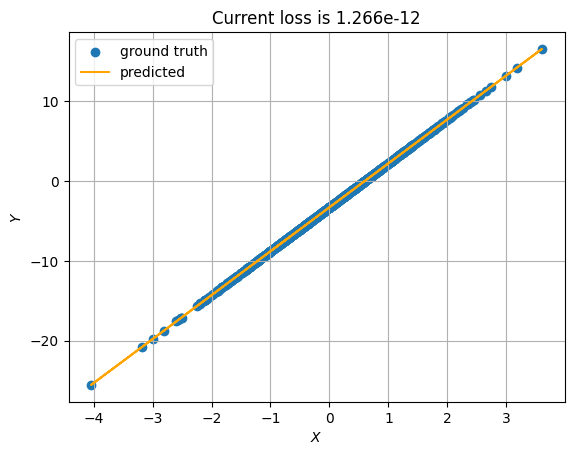

In [11]:
plot(X, Y, model)

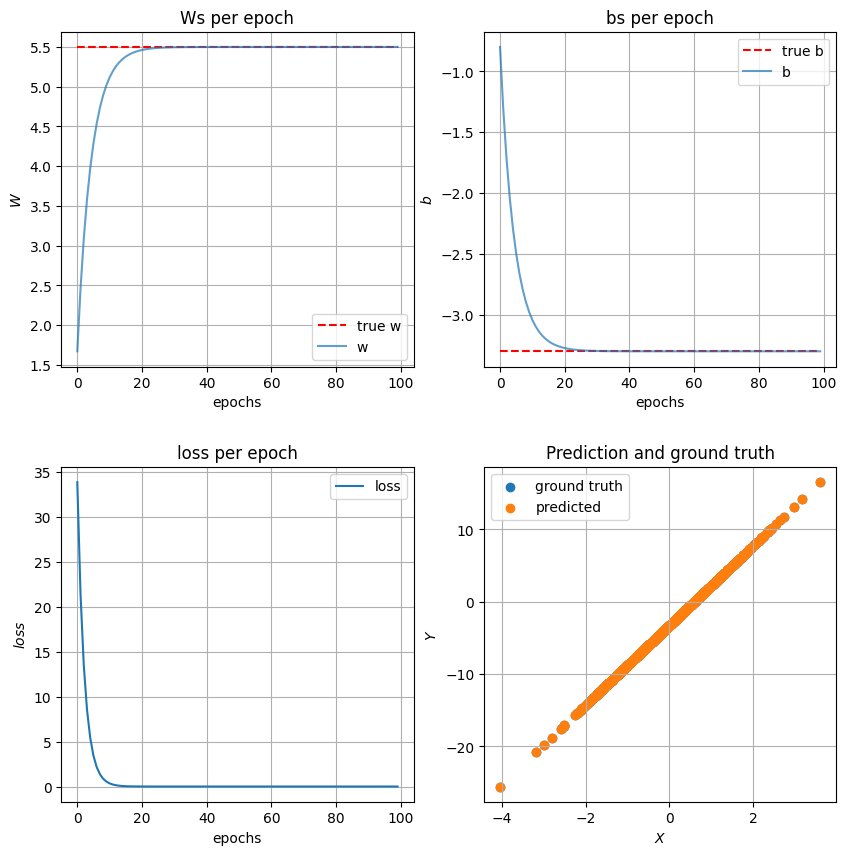

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(2,2,1)
ax.plot([TRUE_W] * EPOCHS, 'r--', label='true w')
ax.plot(ws, alpha=0.7, label='w');
ax.grid(True)
ax.set_xlabel('epochs')
ax.set_ylabel('$W$')
ax.set_title('Ws per epoch');
ax.legend();

ax = plt.subplot(2,2,2)
ax.plot([TRUE_B] * EPOCHS, 'r--', label='true b')
ax.plot(bs, alpha=0.7, label='b');
ax.grid(True)
ax.set_xlabel('epochs')
ax.set_ylabel('$b$')
ax.set_title('bs per epoch');
ax.legend();

ax = plt.subplot(2,2,3)
ax.plot(losses, label='loss');
ax.grid(True)
ax.set_xlabel('epochs')
ax.set_ylabel('$loss$')
ax.set_title('loss per epoch');
ax.legend();

ax = plt.subplot(2,2,4)
ax.scatter(X, Y, label='ground truth')
ax.scatter(X, model(X), label='predicted');
ax.grid(True)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_title('Prediction and ground truth');
ax.legend();

fig.subplots_adjust(hspace=0.3)